In [1]:
import pandas as pd
import numpy as np
import IPython.display as display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
import scipy.stats as stats
#from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
import xgboost as xgb
from sklearn.cross_validation import *
from sklearn.grid_search import GridSearchCV 
from sklearn.externals import joblib
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
%matplotlib inline

/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
#read the data from the csv file
data=pd.read_csv('/home/ashwin/Downloads/xyz.csv')

In [3]:
#check the sample data
print(data.head())

   Gender  IsUrban  IsEmployed  BoughtBefore  TakenLoan  IsStudying  \
0       1        0           1             1          0           0   
1       1        1           1             0          0           0   
2       0        0           1             0          1           1   
3       1        0           0             1          0           0   
4       1        1           0             0          1           1   

   UseTwitter  HasCar  TraveledAbroad  PreviouslyTargetedMktg   ...     \
0           0       1               0                       1   ...      
1           0       0               0                       1   ...      
2           1       0               0                       1   ...      
3           0       1               1                       1   ...      
4           0       0               1                       0   ...      

   NormalizedDemographyIndex  NormalizedInternetIndex  \
0                   0.435351                -4.156494   
1             

In [4]:
#to know what are the coloumns are present
coloumns=list(data)
print(coloumns)

In [5]:
#to check what is the type of the data present in the file
data.dtypes

Gender                         int64
IsUrban                        int64
IsEmployed                     int64
BoughtBefore                   int64
TakenLoan                      int64
IsStudying                     int64
UseTwitter                     int64
HasCar                         int64
TraveledAbroad                 int64
PreviouslyTargetedMktg         int64
NormalizedSalary             float64
NormalizedDemographyIndex    float64
NormalizedInternetIndex      float64
NormalizedPurchaseIndex      float64
NormalizedIndex1             float64
NormalizedIndex2             float64
NormalizedIndex3             float64
NormalizedIndex4             float64
NormalizedIndex5             float64
NormalizedIndex6             float64
Bought?                        int64
dtype: object

In [6]:
#to check the number of non null values present in the data
#data.isnull().sum() //to check the null values present in the each coloum
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110006 entries, 0 to 110005
Data columns (total 21 columns):
Gender                       110006 non-null int64
IsUrban                      110006 non-null int64
IsEmployed                   110006 non-null int64
BoughtBefore                 110006 non-null int64
TakenLoan                    110006 non-null int64
IsStudying                   110006 non-null int64
UseTwitter                   110006 non-null int64
HasCar                       110006 non-null int64
TraveledAbroad               110006 non-null int64
PreviouslyTargetedMktg       110006 non-null int64
NormalizedSalary             110006 non-null float64
NormalizedDemographyIndex    110006 non-null float64
NormalizedInternetIndex      110006 non-null float64
NormalizedPurchaseIndex      110006 non-null float64
NormalizedIndex1             110006 non-null float64
NormalizedIndex2             110006 non-null float64
NormalizedIndex3             110006 non-null float64
Normaliz

In [7]:
#to have the very rough idea how the distributions are there
print(data.describe())

              Gender        IsUrban     IsEmployed   BoughtBefore  \
count  110006.000000  110006.000000  110006.000000  110006.000000   
mean        0.712225       0.499582       0.296784       0.497700   
std         0.452728       0.500002       0.456843       0.499997   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         1.000000       0.000000       0.000000       0.000000   
75%         1.000000       1.000000       1.000000       1.000000   
max         1.000000       1.000000       1.000000       1.000000   

           TakenLoan     IsStudying     UseTwitter         HasCar  \
count  110006.000000  110006.000000  110006.000000  110006.000000   
mean        0.436658       0.498709       0.502118       0.499955   
std         0.495974       0.500001       0.499998       0.500002   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.0000

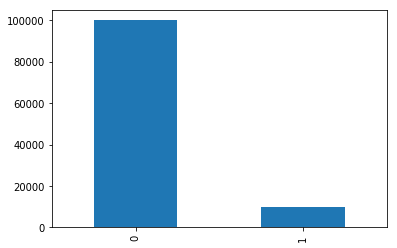

In [8]:
#since it is a classification problem we need to check 
# the data is imbalance or balanced from the below figure we can know that data
#is imbalance
data['Bought?'].value_counts().plot(kind='bar')

In [ ]:
#divide the variables as the catagorical variables and continous variables
catagorical_variables=[var for var in coloumns if(data[var].dtype=='int64')]
continous_variables=[var for var in coloumns 
                     if(var not in catagorical_variables)]
del catagorical_variables[-1]
print(continous_variables,catagorical_variables)
# checking the skewness
# since all the continous variables are normalized skewness in in the acceptable range
#so no need of data transformation
for variable in continous_variables:
    print(variable,stats.skew(data[variable]))

In [ ]:
dummified_data=data[catagorical_variables].astype(np.object)
#dummified_data=data[catagorical_variables]
dummified_data=pd.get_dummies(dummified_data)
dummified_data.shape

In [ ]:
data_modified=pd.concat((dummified_data,data[continous_variables]),axis=1)
list(data_modified)

In [16]:
print(data_modified.shape)
target=data['Bought?']

(110006, 30)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( data_modified,target,
        random_state=100,test_size=0.30,stratify=target)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
sm = SMOTETomek(random_state=12,ratio=1)
x_res, y_res = sm.fit_sample(X_train, y_train)
print(x_res.shape)
print( np.bincount(y_res))

In [ ]:
#xgb_model = xgb.XGBClassifier()
#parameters = {'objective':['binary:logistic'],
#              'learning_rate': [0.001,0.005,0.01,0.05,0.1,0.5], #so called `eta` value
#              'max_depth': [7,8,9,10],
#              'min_child_weight': [6,7,8,9,10],
#              'silent': [1],
#              'subsample': [0.5],
#              'colsample_bytree': [0.6,0.7,0.8],
#              'n_estimators': [25],
#              'seed': [100]}
#clf = GridSearchCV(xgb_model, parameters, n_jobs=-1, 
#                   cv=StratifiedKFold(y_res, n_folds=3, shuffle=True), 
#                   scoring='roc_auc',
#                   refit=True)
#clf.fit(x_res,y_res)
#print(clf.best_params_,clf.best_score_)
#joblib.dump(clf, 'xgboost.pkl', compress=True)

In [43]:
xgb_model=xgb.XGBClassifier(colsample_bytree= 0.8,learning_rate= 0.1,
                            max_depth=7,min_child_weight= 8,n_estimators=1000
                            ,objective= 'binary:logistic',seed=100,
                            silent= 1, subsample=0.5)
xgb_model.fit(x_res,y_res)
predictions=xgb_model.predict(X_train.as_matrix())
print('XGboost Classifier train/validation result')
print('accuracy',metrics.accuracy_score(y_train,predictions))
print('recall',metrics.recall_score(y_train,predictions))
print('precision',metrics.precision_score(y_train,predictions))
print('auc-roc',metrics.roc_auc_score(y_train,predictions))
pd.crosstab(y_train, predictions, rownames=['True'], 
            colnames=['Predicted'], margins=True)

XGboost Classifier train/validation result
accuracy 0.976520700223
recall 0.784142857143
precision 0.948669201521
auc-roc 0.889950121218


Predicted,0,1,All
True,,,
0,69707,297,70004
1,1511,5489,7000
All,71218,5786,77004


In [44]:
predictions=xgb_model.predict(X_test.as_matrix())
print('XGboost Classifier test result')
print('accuracy',metrics.accuracy_score(y_test,predictions))
print('recall',metrics.recall_score(y_test,predictions))
print('precision',metrics.precision_score(y_test,predictions))
print('auc-roc',metrics.roc_auc_score(y_test,predictions))
pd.crosstab(y_test, predictions, rownames=['True'], 
            colnames=['Predicted'], margins=True)

XGboost Classifier test result
accuracy 0.902611962911
recall 0.299
precision 0.44671314741
auc-roc 0.630984567695


Predicted,0,1,All
True,,,
0,28891,1111,30002
1,2103,897,3000
All,30994,2008,33002


#report of the xgboost
#in the above we can notice that recall is too bad for the testing data
#auc-roc score is too bad compared to the train/validation data's auc

In [46]:
model=LogisticRegression()
grid_values = {'penalty': ['l2'], 'C': [0.001,0.005,0.01,0.05,0.1
    ,0.5,1,10,100,1000,5000,7500,10000,12500],'class_weight':[{0:.40, 1:.60}],
               'solver' : ['newton-cg','lbfgs','liblinear','sag','saga']}
logistic_model = GridSearchCV(model, param_grid=grid_values,
                cv=StratifiedKFold(y_res, n_folds=3, shuffle=True),
                n_jobs=-1,scoring='roc_auc',refit=True)
logistic_model.fit(x_res,y_res)
print(logistic_model.best_params_,logistic_model.best_score_)
#model=LogisticRegression(C=1000,penalty='l2')
#model.fit(x_res,y_res)
predictions=logistic_model.predict(X_train)
print('Logistic Regression Classifier Train/valadiation result')
print('accuracy',metrics.accuracy_score(y_train,predictions))
print('recall',metrics.recall_score(y_train,predictions))
print('precision',metrics.precision_score(y_train,predictions))
print('auc-roc',metrics.roc_auc_score(y_train,predictions))
pd.crosstab(y_train, predictions, rownames=['True'], 
            colnames=['Predicted'], margins=True)

{'C': 10000, 'class_weight': {0: 0.4, 1: 0.6}, 'penalty': 'l2', 'solver': 'sag'} 0.7673901910151606
Logistic Regression Classifier Train/valadiation result
accuracy 0.580424393538
recall 0.796
precision 0.152854360409
auc-roc 0.677434032341


Predicted,0,1,All
True,,,
0,39123,30881,70004
1,1428,5572,7000
All,40551,36453,77004


In [48]:
predictions=logistic_model.predict(X_test)
print('logistic regression Classifier test result')
print('accuracy',metrics.accuracy_score(y_test,predictions))
print('recall',metrics.recall_score(y_test,predictions))
print('precision',metrics.precision_score(y_test,predictions))
print('auc-roc',metrics.roc_auc_score(y_test,predictions))
pd.crosstab(y_test, predictions, rownames=['True'], 
            colnames=['Predicted'], margins=True)

logistic regression Classifier test result


accuracy 0.579389127932
recall 0.798666666667
precision 0.152874369936
auc-roc 0.678064751239


Predicted,0,1,All
True,,,
0,16725,13277,30002
1,604,2396,3000
All,17329,15673,33002


#report on the logistic regression
#accuracy in both test and train data is too bad
#recall rate is too haigh compared all the models but companys need to spen lot of mo
#money to recommend lot of people

In [ ]:
#this part taking lot of time to train the model
#model=SVC()
#param_grid = [
# {'C': [1000], 'kernel': ['linear']},
#{'C': [1, 10, 100, 1000], 'gamma': [0.1,0.01,0.001, 0.0001], 'kernel': ['rbf','sigmoid']},
 #]
#SVM_model = GridSearchCV(model, param_grid=param_grid,
 #               n_jobs=-1,scoring='roc_auc',refit=True)
#SVM_model.fit(x_res,y_res)
#print(SVM_model.best_params_,SVM_model.best_score_)
#predictions=SVM_model.predict(X_train)
#print('accuracy',metrics.accuracy_score(y_train,predictions))
#print('recall',metrics.recall_score(y_train,predictions))
#print('precision',metrics.precision_score(y_train,predictions))
#print('auc-roc',metrics.roc_auc_score(y_train,predictions))

#pd.crosstab(y_train, predictions, rownames=['True'], 
#            colnames=['Predicted'], margins=True)

In [39]:
#BaggingClassifier can achive parallism and get the results faster
n_estimators=20
model=BaggingClassifier(SVC(C=500,kernel='rbf',gamma=0.01,
     probability=True, class_weight={0:.1, 1:.9})
    , max_samples=1.0 / n_estimators, n_estimators=n_estimators,n_jobs=-1)
model.fit(x_res,y_res)

predictions=model.predict(X_train)
print('SVM Classifier train/valadiation result')
print('accuracy',metrics.accuracy_score(y_train,predictions))
print('recall',metrics.recall_score(y_train,predictions))
print('precision',metrics.precision_score(y_train,predictions))
print('auc-roc',metrics.roc_auc_score(y_train,predictions))
pd.crosstab(y_train, predictions, rownames=['True'], 
            colnames=['Predicted'], margins=True)

SVM Classifier train/valadiation result
accuracy 0.850254532232
recall 0.734571428571
precision 0.347080661492
auc-roc 0.798196805081


Predicted,0,1,All
True,,,
0,60331,9673,70004
1,1858,5142,7000
All,62189,14815,77004


In [41]:
predictions=model.predict(X_test)
print('SVM Classifier test result')
print('accuracy',metrics.accuracy_score(y_test,predictions))
print('recall',metrics.recall_score(y_test,predictions))
print('precision',metrics.precision_score(y_test,predictions))
print('auc-roc',metrics.roc_auc_score(y_test,predictions))

pd.crosstab(y_test, predictions, rownames=['True'], 
            colnames=['Predicted'], margins=True)

SVM Classifier test result
accuracy 0.848857644991
recall 0.692
precision 0.338110749186
auc-roc 0.778271181921


Predicted,0,1,All
True,,,
0,25938,4064,30002
1,924,2076,3000
All,26862,6140,33002


#report of svm
#there is no much difference is there in the eveluation matrix in the 
#training/validation and testing are giving good results than other models

In [ ]:
#model=RandomForestClassifier()
#param_dist = {"max_depth": [None],
#              "max_features": ["auto"],
#              "min_samples_split": [6,7,8],
#              "min_samples_leaf": [1,3,5],
#              "bootstrap": [True],
#              "criterion": ["gini", "entropy"],
#              "n_estimators":[500],
#              "n_jobs":[-1],
#              "oob_score":[True],
#              "random_state":[True],
#              "class_weight":{0:.10, 1:.90}
#              }
#RF_model = GridSearchCV(model, param_grid=param_dist,
#                n_jobs=-1,scoring='roc_auc',refit=True,verbose=2)
#RF_model.fit(x_res,y_res)
#print(RF_model.best_params_,RF_model.best_score_)
#predictions=RF_model.predict(X_test)
#print('accuracy',metrics.accuracy_score(y_test,predictions))
#print('recall',metrics.recall_score(y_test,predictions))
#print('precision',metrics.precision_score(y_test,predictions))
#print('auc-roc',metrics.roc_auc_score(y_test,predictions))
#
#pd.crosstab(y_train, predictions, rownames=['True'], 
#            colnames=['Predicted'], margins=True)

In [53]:
#sample_leaf_options = [1,5,10]
#for leaf_size in sample_leaf_options :
#    model = RandomForestClassifier(n_estimators = 1000, oob_score = True, 
#                n_jobs = -1,random_state =50,max_features = "auto"
#                                   , min_samples_leaf = leaf_size)
#    model.fit(x_res,y_res)
#    print("AUC - ROC : ", metrics.roc_auc_score(y_train,model.predict(X_train)))
model = RandomForestClassifier(n_estimators = 500, oob_score = True, 
                n_jobs = -1,random_state =50,max_features = "auto"
                                   , min_samples_leaf = 3,
                               class_weight={0:.010, 1:.90})
model.fit(x_res,y_res)
predictions=model.predict(X_train)
print('RandomForest Classifier train/valadiation result')
print('accuracy',metrics.accuracy_score(y_train,predictions))
print('recall',metrics.recall_score(y_train,predictions))
print('precision',metrics.precision_score(y_train,predictions))
print('auc-roc',metrics.roc_auc_score(y_train,predictions))

pd.crosstab(y_train, predictions, rownames=['True'], 
            colnames=['Predicted'], margins=True)

RandomForest Classifier train/valadiation result
accuracy 0.96043062698
recall 0.999857142857
precision 0.696764559482
auc-roc 0.978172671766


Predicted,0,1,All
True,,,
0,66958,3046,70004
1,1,6999,7000
All,66959,10045,77004


In [53]:
predictions=model.predict(X_test)
print('RandomForest Classifier test result')
print('accuracy',metrics.accuracy_score(y_test,predictions))
print('recall',metrics.recall_score(y_test,predictions))
print('precision',metrics.precision_score(y_test,predictions))
print('auc-roc',metrics.roc_auc_score(y_test,predictions))

pd.crosstab(y_test, predictions, rownames=['True'], 
            colnames=['Predicted'], margins=True)

RandomForest Classifier test result
accuracy 0.880916308103
recall 0.504666666667
precision 0.382516422436
auc-roc 0.711602715375


Predicted,0,1,All
True,,,
0,27558,2444,30002
1,1486,1514,3000
All,29044,3958,33002


#report on the random forest
#this can be considered but the recall rate is very low compared to the scm

###conclusion
#from the above models SVM with the rbf kernal is the most promising results
#i suggest the management to go with the svm